In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('Candy_Products.csv')
df

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


In [15]:
df.dtypes

Division         object
Product Name     object
Factory          object
Product ID       object
Unit Price      float64
Unit Cost       float64
dtype: object

In [9]:
df.isnull().sum()

Factory      0
Latitude     0
Longitude    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.head()

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [23]:
df.tail()

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
10,Sugar,Everlasting Gobstopper,Secret Factory,SUG-EVE-47000,10.00,2.0
11,Sugar,Hair Toffee,The Other Factory,SUG-HAI-55000,4.50,1.0
12,Other,Lickable Wallpaper,Secret Factory,OTH-LIC-15000,20.00,10.0
13,Other,Wonka Gum,Secret Factory,OTH-GUM-21000,1.25,0.6
14,Other,Kazookles,The Other Factory,OTH-KAZ-38000,3.25,3.0


In [27]:
df.duplicated

<bound method DataFrame.duplicated of      Division                       Product Name            Factory  \
0   Chocolate  Wonka Bar - Nutty Crunch Surprise      Lot's O' Nuts   
1   Chocolate          Wonka Bar - Fudge Mallows      Lot's O' Nuts   
2   Chocolate     Wonka Bar -Scrumdiddlyumptious      Lot's O' Nuts   
3   Chocolate         Wonka Bar - Milk Chocolate    Wicked Choccy's   
4   Chocolate  Wonka Bar - Triple Dazzle Caramel    Wicked Choccy's   
5       Sugar                        Laffy Taffy        Sugar Shack   
6       Sugar                          SweeTARTS        Sugar Shack   
7       Sugar                              Nerds        Sugar Shack   
8       Sugar                            Fun Dip        Sugar Shack   
9       Other               Fizzy Lifting Drinks        Sugar Shack   
10      Sugar             Everlasting Gobstopper     Secret Factory   
11      Sugar                        Hair Toffee  The Other Factory   
12      Other                 Lickable 

In [29]:
for each_name in df.columns: 
    print(each_name)
    print(df[each_name].unique())

Division
['Chocolate' 'Sugar' 'Other']
Product Name
['Wonka Bar - Nutty Crunch Surprise' 'Wonka Bar - Fudge Mallows'
 'Wonka Bar -Scrumdiddlyumptious' 'Wonka Bar - Milk Chocolate'
 'Wonka Bar - Triple Dazzle Caramel' 'Laffy Taffy' 'SweeTARTS' 'Nerds'
 'Fun Dip' 'Fizzy Lifting Drinks' 'Everlasting Gobstopper' 'Hair Toffee'
 'Lickable Wallpaper' 'Wonka Gum' 'Kazookles']
Factory
["Lot's O' Nuts" "Wicked Choccy's" 'Sugar Shack' 'Secret Factory'
 'The Other Factory']
Product ID
['CHO-NUT-13000' 'CHO-FUD-51000' 'CHO-SCR-58000' 'CHO-MIL-31000'
 'CHO-TRI-54000' 'SUG-LAF-25000' 'SUG-SWE-91000' 'SUG-NER-92000'
 'SUG-FUN-75000' 'OTH-FIZ-56000' 'SUG-EVE-47000' 'SUG-HAI-55000'
 'OTH-LIC-15000' 'OTH-GUM-21000' 'OTH-KAZ-38000']
Unit Price
[ 3.49  3.6   3.25  3.75  1.99  1.5  10.    4.5  20.    1.25]
Unit Cost
[ 1.    1.2   1.1   1.14  1.3   0.75  0.8   0.9   1.5   2.   10.    0.6
  3.  ]


In [35]:
df['Division'] = df['Division'].astype('category')
df['Factory'] = df['Factory'].astype('category')
df['Product Name'] = df['Product Name'].astype('category')
df['Product ID'] = df['Product ID'].astype('category')

In [37]:
df.dtypes

Division        category
Product Name    category
Factory         category
Product ID      category
Unit Price       float64
Unit Cost        float64
dtype: object

In [ ]:
## perform EDA


In [41]:
df.describe().round()

,Unit Price,Unit Cost
count,15.0,15.0
mean,4.0,2.0
std,5.0,2.0
min,1.0,1.0
25%,2.0,1.0
50%,3.0,1.0
75%,4.0,1.0
max,20.0,10.0


In [45]:
numerical_cols=df.select_dtypes(include=['category','float',])

In [47]:
numerical_cols

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50


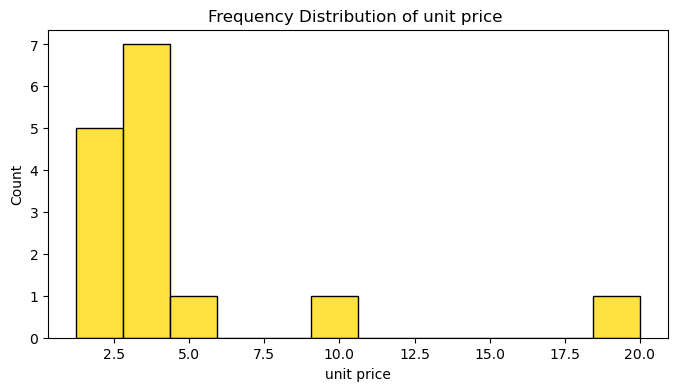

In [49]:
plt.figure(figsize=(8, 4))

plt.title('Frequency Distribution of unit price ')
plt.xlabel('unit price')
plt.ylabel('Count') 

sns.histplot(df['Unit Price'][df['Unit Price'] < 100000], color='gold') 

plt.show()


## building validation framework

In [ ]:
traning dataset60%
validation dataset20%
testing dataset20%    

In [66]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)


print(f'Size of Training Dataset: {len(df_train)}')
print(f'Size of Validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')

Size of Training Dataset: 9
Size of Validation Dataset: 3
Size of Testing Dataset: 3


In [68]:
## selecting target variable from the dataframe 
y_train = df_train['Unit Price']
y_valid = df_valid['Unit Price']
y_test = df_test['Unit Price']

In [70]:
y_train

0      3.49
5      1.99
9      3.75
2      3.60
10    10.00
7      1.50
4      3.75
6      1.50
11     4.50
Name: Unit Price, dtype: float64

In [72]:
## deleting the target variable from the dataframe
del df_train['Unit Price']
del df_valid['Unit Price']
del df_test['Unit Price'] 

In [74]:
df_train.isnull().sum()

Division        0
Product Name    0
Factory         0
Product ID      0
Unit Cost       0
dtype: int64

In [76]:
## converting dataframe to a vector 
y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 
y_test = np.log1p(y_test).values

In [78]:
y_train

array([1.5018527 , 1.09527339, 1.55814462, 1.5260563 , 2.39789527,
       0.91629073, 1.55814462, 0.91629073, 1.70474809])

In [86]:
## converting dataframe to matrix format / numpy array 
X_train = df_train.select_dtypes(include=[ 'float']).values
X_valid = df_valid.select_dtypes(include=[ 'float']).values
X_test = df_test.select_dtypes(include=[ 'float']).values

In [88]:
X_train

array([[1.  ],
       [0.75],
       [1.5 ],
       [1.1 ],
       [2.  ],
       [0.8 ],
       [1.3 ],
       [0.8 ],
       [1.  ]])

In [90]:
## creating an instance of a regression 
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train, y_train)

LinearRegression()

In [92]:
## generate validation predictions on the validation set  
y_valid_pred = lr_model.predict(X_valid)

In [94]:
y_valid_pred

array([10.37854132,  0.9217081 ,  1.52533576])

In [96]:
rmse = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Validation Accuracy: {round(rmse, 2) * 100} %')

Validation Accuracy: 423.00000000000006 %
